<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/4_Clasificacion/Clasificacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Clasificación

In [115]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("font", size=14)

## Limitaciones de la Regresión Lineal

In [116]:
lst1 = [*range(10, 30)]
lst2 = [0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1]

In [117]:
print(lst1)
print(lst2)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [118]:
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['edad', 'compra'])
df.head()

,edad,compra
0,10,0
1,11,0
2,12,0
3,13,0
4,14,0


<Axes: xlabel='edad', ylabel='compra'>

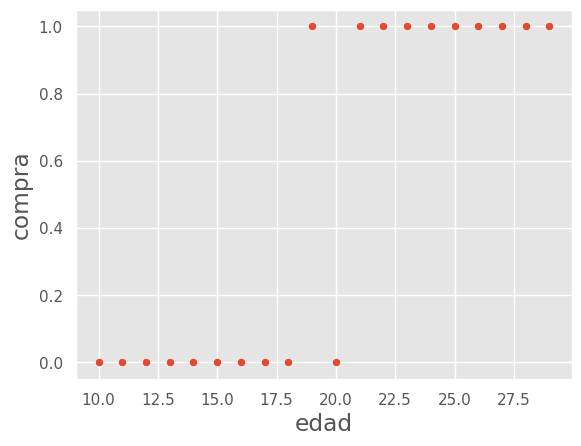

In [119]:
sns.scatterplot(data=df, x="edad", y="compra")

In [120]:
X = df['edad'].values.reshape(-1, 1)
y = df['compra'].values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(X, y)

In [121]:
df['compra_pred'] = reg.predict(X)
df.head()

,edad,compra,compra_pred
0,10,0,-0.200000
1,11,0,-0.126316
2,12,0,-0.052632
3,13,0,0.021053
4,14,0,0.094737


<Axes: xlabel='edad', ylabel='compra'>

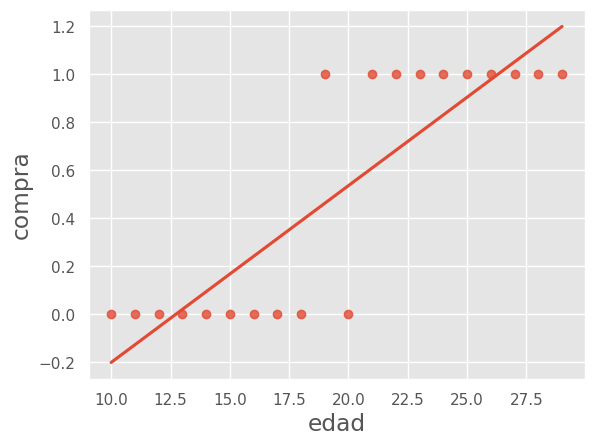

In [122]:
sns.regplot(data=df, x="edad", y="compra", ci=None)

<Axes: xlabel='edad', ylabel='compra'>

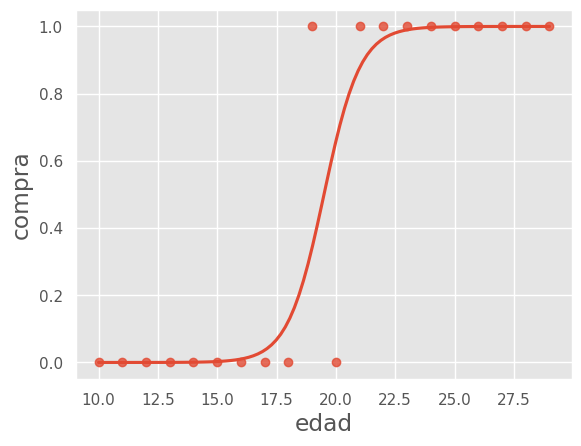

In [123]:
sns.regplot(data=df, x="edad", y="compra", logistic=True, ci=None)

## Regresión Logística

In [124]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [125]:
titanic = pd.read_csv('/content/sample_data/titanic_clase4.csv')


In [126]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preparación del dataset
Vamos a conservar solo algunas de las variables:

In [128]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

df = titanic[columns]
df.dropna(inplace = True) #eliminamos los registros con faltantes

<ipython-input-128-264feff70b57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True) #eliminamos los registros con faltantes


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


Vamos a usar la libreria **[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)** para realizar un breve análisis exploratorio del dataset.

In [130]:
#!pip install ydata-profiling

In [131]:
from ydata_profiling import ProfileReport

In [132]:
# Generate the Profiling Report
profile = ProfileReport(df)

In [133]:
# Or use the HTML report in an iframe
profile
# Si no ves el output interactivo abajo de esta celda, volver a ejecutar en Colab

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Realizamos la transformación del **One-Hot-Encoder** para las variables categróricas. Recordamos no caer en la *trampa dummy*.

In [134]:
cat_vars = ['Sex', 'Pclass', 'Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var, drop_first=True) #el parametro drop_first elimina la posibilidad de caer en una trampa dummy
    df_1=df.join(cat_list)
    df=df_1

In [135]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,7.2500,S,True,False,True,False,True
1,1,1,female,38.0,1,71.2833,C,False,False,False,False,False
2,1,3,female,26.0,0,7.9250,S,False,False,True,False,True
3,1,1,female,35.0,1,53.1000,S,False,False,False,False,True
4,0,3,male,35.0,0,8.0500,S,True,False,True,False,True


Otra forma es utilizando
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) de sklearn.preprocessing


In [136]:
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
df_final=df[to_keep]

In [137]:
df_final.head()

,Survived,Age,SibSp,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,7.2500,True,False,True,False,True
1,1,38.0,1,71.2833,False,False,False,False,False
2,1,26.0,0,7.9250,False,False,True,False,True
3,1,35.0,1,53.1000,False,False,False,False,True
4,0,35.0,0,8.0500,True,False,True,False,True


In [138]:
df = df_final

## Modelo

Vamos a sar el módulo [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de sklearn


In [139]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [140]:
# Partición en train y test
y = df.loc[:, df.columns == 'Survived']
X = df.loc[:, df.columns != 'Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [141]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [142]:
# entrenamiento
logisticRegr.fit(x_train, y_train)
#logisticRegr.fit(x_train, y_train, solver='liblinear')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [143]:
# performance en test
y_pred = logisticRegr.predict(x_test)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(x_test, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.78


In [144]:
# performance en test
y_pred_train = logisticRegr.predict(x_train)
print('El accuracy de nuestra regresión logística en el set de Training es: {:.2f}'.format(logisticRegr.score(x_train, y_train)))

El accuracy de nuestra regresión logística en el set de Training es: 0.82


## Interpretación

In [145]:
logisticRegr.coef_

array([[-0.0429614 , -0.35232257,  0.00315788, -2.31273016, -0.87158325,
        -2.0682657 , -0.68669656, -0.62362377]])

In [146]:
logisticRegr.intercept_

array([4.05549255])

In [147]:
coeficientes= pd.DataFrame(logisticRegr.coef_[0],
                X.columns,
                columns=['coef'])
coeficientes

,coef
Age,-0.042961
SibSp,-0.352323
Fare,0.003158
Sex_male,-2.312730
Pclass_2,-0.871583
Pclass_3,-2.068266
Embarked_Q,-0.686697
Embarked_S,-0.623624


## Métricas de evaluación



**Matriz de confusión**

Observación: la matriz de confsión de sklearn está espejada respecto a lo visto en la teoría:

                                tn fp
                                fn tp

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[74 11]
 [21 37]]


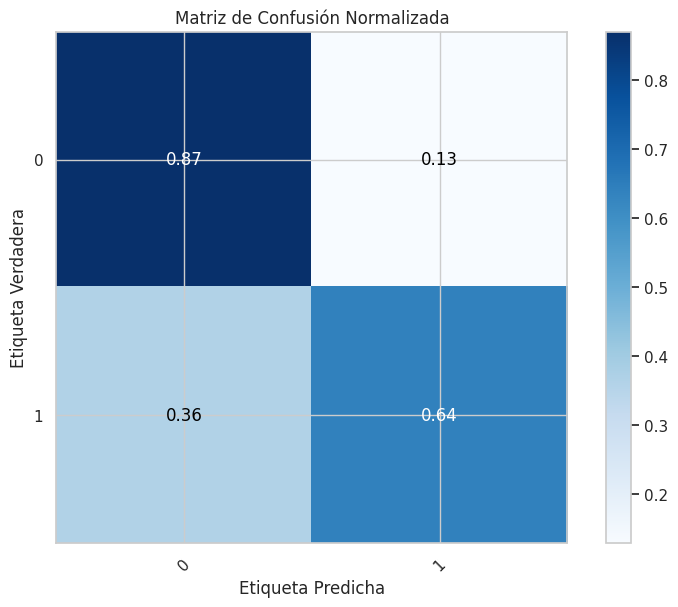

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Supongamos que tienes tus etiquetas verdaderas y etiquetas predichas
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtiene las etiquetas únicas de las clases
classes = unique_labels(y_test, y_pred)

# Visualiza la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title if title else 'Matriz de Confusión')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Llama a la función para mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Matriz de Confusión Normalizada')
plt.show()

**Precision, Recall y F-Score**

In [151]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [152]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.776224
Precision: 0.770833
Recall: 0.637931
F1 score: 0.698113


In [153]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred_train)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred_train)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred_train)
print('F1 score: %f' % f1)

Accuracy: 0.815466
Precision: 0.796209
Recall: 0.730435
F1 score: 0.761905


**ROC**

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [155]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])

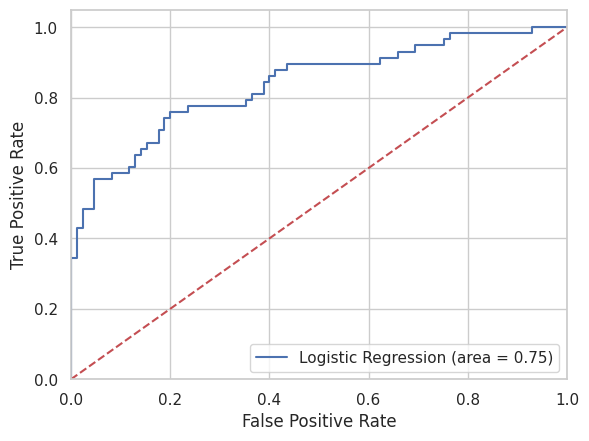

In [156]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [157]:
# Calcular el AUC-ROC
auc_roc_test = roc_auc_score(y_test, y_pred)
print("Área bajo la curva ROC Test:", auc_roc_test)

Área bajo la curva ROC Test: 0.7542596348884382


In [158]:
# Calcular el AUC-ROC
auc_roc_train = roc_auc_score(y_train, y_pred_train)
print("Área bajo la curva ROC Training:", auc_roc_train)

Área bajo la curva ROC Training: 0.8017955623957933


Veamos que sucede si entrenamos un modelos con **menor cantidad de variables**

In [159]:
# Partición en train y test
y_2 = df.loc[:, df.columns == 'Survived']
X_2 = df.loc[:, ['Age', 'Embarked_Q', 'Embarked_S']]

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=99)

In [160]:
logisticRegr_2 = LogisticRegression(max_iter=10000)
logisticRegr_2.fit(x_train_2, y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [161]:
y_pred_2 = logisticRegr_2.predict(x_test_2)

Matriz de confusión

In [162]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test_2, y_pred_2)

# Obtiene las etiquetas únicas de las clases
classes = unique_labels(y_test_2, y_pred_2)

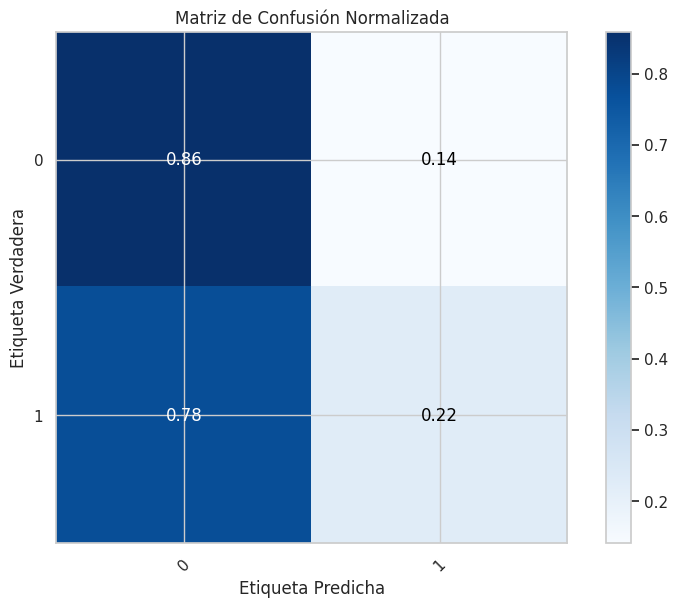

In [163]:
# Llama a la función para mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Matriz de Confusión Normalizada')
plt.show()


Métricas varias

In [164]:
# accuracy: (tp + tn) / (p + n)
accuracy_2=accuracy_score(y_test_2, y_pred_2)
print('Accuracy: %f' % accuracy_2)

# precision tp / (tp + fp)
precision_2 = precision_score(y_test_2, y_pred_2)
print('Precision: %f' % precision_2)

# recall: tp / (tp + fn)
recall_2 = recall_score(y_test_2, y_pred_2)
print('Recall: %f' % recall_2)

# f1: 2 tp / (2 tp + fp + fn)
f1_2 = f1_score(y_test_2, y_pred_2)
print('F1 score: %f' % f1_2)

Accuracy: 0.601399
Precision: 0.520000
Recall: 0.224138
F1 score: 0.313253


Curva ROC

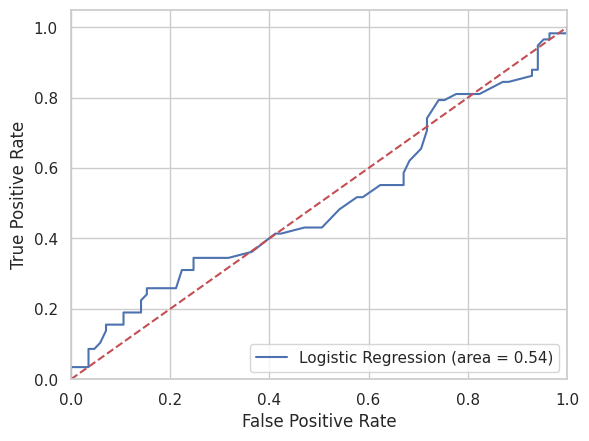

In [165]:
logit_roc_auc_2 = roc_auc_score(y_test_2, logisticRegr_2.predict(x_test_2))
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2, logisticRegr_2.predict_proba(x_test_2)[:,1])

plt.figure()
plt.plot(fpr_2, tpr_2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()